# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [1]:
import pandas as pd

df = pd.read_csv("loan_data.csv")

print(df.head())
print(df.info())
print(df['loan_status'].value_counts())

   person_age person_gender person_education  person_income  person_emp_exp  \
0          71          male        Associate   46817.176426               3   
1          34          male      High School   79093.494008              17   
2          80          male        Associate   67819.614431              20   
3          40        female        Associate   49599.861220               0   
4          43          male        Doctorate   99833.900180               8   

  person_home_ownership     loan_amnt loan_intent  loan_int_rate  \
0                  RENT  11567.737650     MEDICAL      10.351469   
1                   OWN   9519.674498     MEDICAL      11.168902   
2                   OWN  16226.604002    PERSONAL      12.293112   
3                  RENT  15641.221708     VENTURE      10.327926   
4                   OWN  12727.942517   EDUCATION       9.338069   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             0.247083                          

# Age vs Loan Status

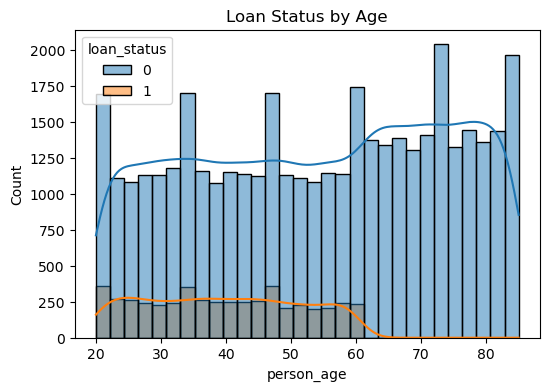

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="person_age", hue="loan_status", kde=True, bins=30)
plt.title("Loan Status by Age")
plt.show()

The model may be penalizing older applicants, which raises concerns about age discrimination.

# Gender vs Loan Status

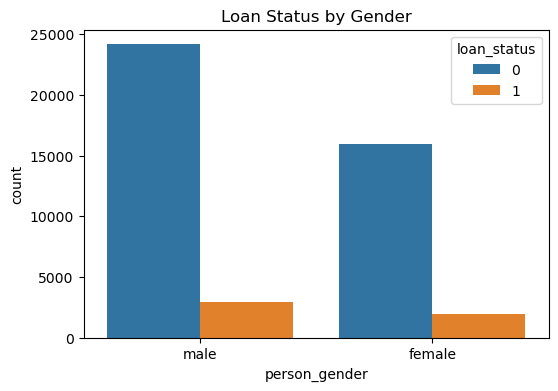

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="person_gender", hue="loan_status")
plt.title("Loan Status by Gender")
plt.show()

Both males and females experience far more rejections than approvals. However, the gap appears somewhat larger for females (fewer approvals relative to rejections. This could indicate gender bias, which is also a legal issue.

# Income vs Loan Status

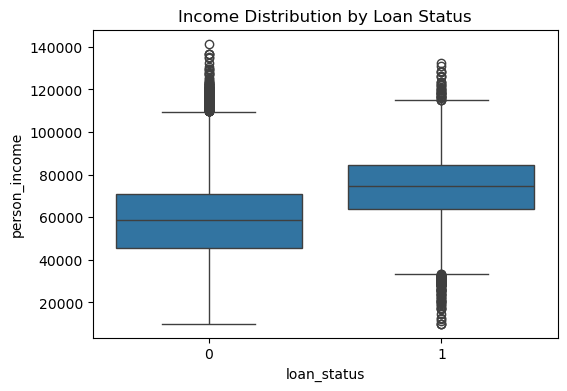

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="loan_status", y="person_income")
plt.title("Income Distribution by Loan Status")
plt.show()

Income is a legitimate factor in credit risk modeling, so this relationship is expected and fair.

# Credit Score vs Loan Status

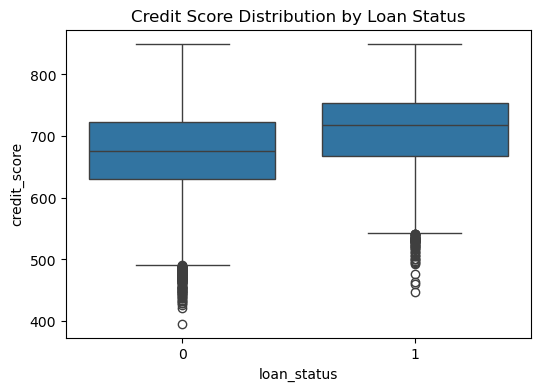

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="loan_status", y="credit_score")
plt.title("Credit Score Distribution by Loan Status")
plt.show()

Credit score is a strong driver of approval and is legally justifiable.

# Loan Amount vs Loan Status

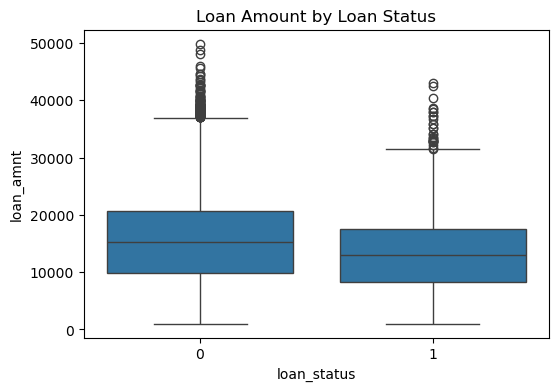

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="loan_status", y="loan_amnt")
plt.title("Loan Amount by Loan Status")
plt.show()

Large loan requests increase financial risk, so this is an expected and fair predictor.

# Employment Experience vs Loan Status

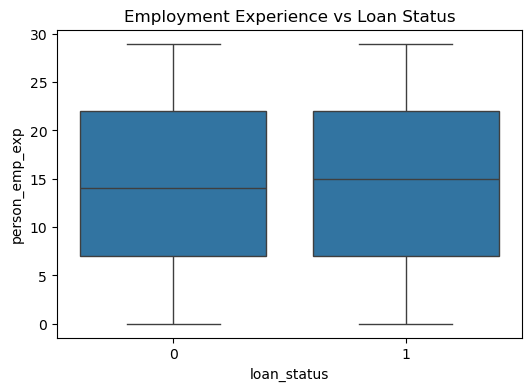

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="loan_status", y="person_emp_exp")
plt.title("Employment Experience vs Loan Status")
plt.show()

Employment experience doesn’t appear to be a strong predictor in this model.

# Previous Loan Defaults vs Loan Status

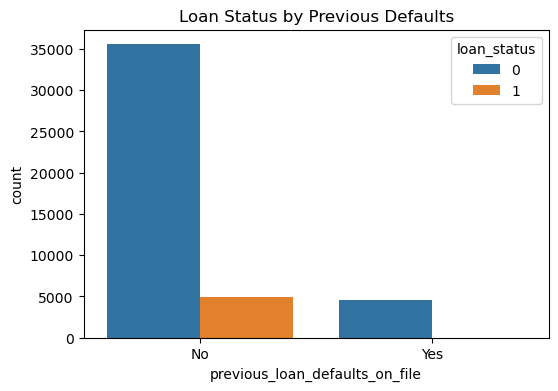

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="previous_loan_defaults_on_file", hue="loan_status")
plt.title("Loan Status by Previous Defaults")
plt.show()

This is a strong predictor of loan rejection and is legitimate since defaults directly relate to financial risk.

# Conclusion
> Looking at the graphs, some things clearly affect whether a loan gets approved while others don’t. People with higher incomes and better credit scores are more likely to get approved, while people asking for bigger loans or those who have defaulted on loans before are usually rejected. These results make sense because they are connected to financial risk. On the other hand, years of work experience doesn’t seem to matter much since both approved and rejected applicants have about the same amount of experience.
What stands out the most is how age and gender seem to play a role. The approval rate for older applicants, especially after age sixty, drops almost to zero, and females appear to get fewer approvals than males. Since age and gender are protected traits, this could be a serious problem for the institution. The model might need to be changed so that it doesn’t use these factors, and instead focuses more on fair measures like income, credit score, and loan history.